In [37]:
import glob
files = glob.glob('./data/CTMCCVPR20/train/*')
mot17files = glob.glob('./data/MOT17Det/train/*')
mot15files = glob.glob('./data/2DMOT2015/train/*')

In [41]:
seq_frame_lens = []
X = []
seq_frame_mot17_lens = []
seq_frame_mot15_lens = []
for f in files:
    ff = glob.glob(f'{f}/img1/*')
    #print(f.split('/')[-1],len(ff))
    X.append(f.split('/')[-1])
    seq_frame_lens.append(len(ff))

for f in mot17files:
    ff = glob.glob(f'{f}/img1/*')
    #print(f.split('/')[-1],len(ff))
    X.append(f.split('/')[-1])
    seq_frame_mot17_lens.append(len(ff))

for f in mot15files:
    ff = glob.glob(f'{f}/img1/*')
    #print(f.split('/')[-1],len(ff))
    X.append(f.split('/')[-1])
    seq_frame_mot15_lens.append(len(ff))

seq_frame_lens = np.sort(seq_frame_lens)
seq_frame_mot15_lens = np.sort(seq_frame_mot15_lens)
seq_frame_mot17_lens = np.sort(seq_frame_mot17_lens)
print(len(seq_frame_mot17_lens), len(seq_frame_lens),len(seq_frame_mot15_lens))

7 47 11


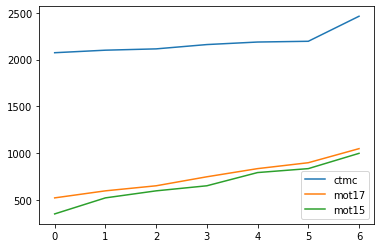

In [50]:
import numpy as np
import matplotlib.pyplot as plt
# import collections
plt.plot(seq_frame_lens[-7:],label ='ctmc')
plt.plot(seq_frame_mot17_lens[-7:],label='mot17')
plt.plot(seq_frame_mot15_lens[-7:],label='mot15')
plt.legend()

In [31]:
seq_frame_mot17_lens

[]

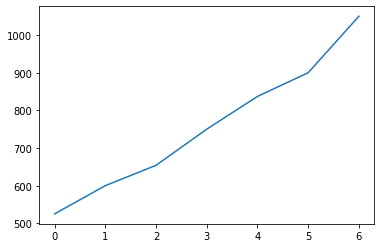

In [36]:
plt.plot(np.sort(seq_frame_mot17_lens))

In [ ]:
sorted_mot17 = 